                              OLS Regression Results                              
Dep. Variable:     yearly_avg_temperature   R-squared:                       0.583
Model:                                OLS   Adj. R-squared:                  0.573
Method:                     Least Squares   F-statistic:                     60.05
Date:                    Sun, 23 Mar 2025   Prob (F-statistic):           1.08e-09
Time:                            09:36:09   Log-Likelihood:                -31.835
No. Observations:                      45   AIC:                             67.67
Df Residuals:                          43   BIC:                             71.28
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/tmp/ipykernel_237688/2825557279.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_per_year = model.params[1]
/tmp/ipykernel_237688/2825557279.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Linear Regression of Temperature (1980-2024)\nTrend: {trend_per_decade:.2f}°C per decade, p-value: {model.pvalues[1]:.6f}')


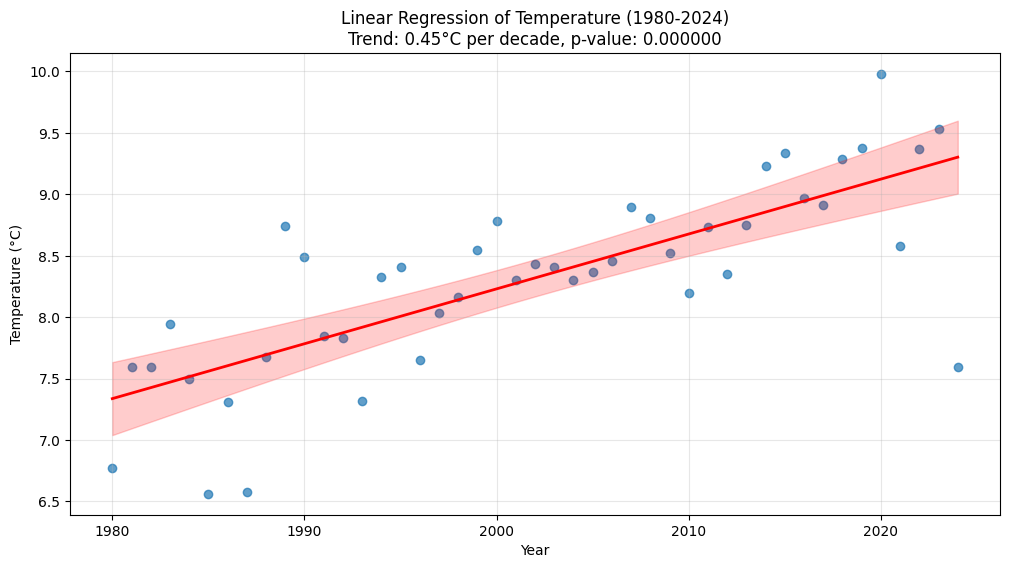

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from scipy import stats

# Load and combine data from all three files
output_dir = "/home/ubuntu/DataEngineering/project/results"
input_files = [
    os.path.join(output_dir, "tg_ens_mean_0.25deg_reg_1980-1994_v30.0e_yearly_avg.csv"),
    os.path.join(output_dir, "tg_ens_mean_0.25deg_reg_1995-2010_v30.0e_yearly_avg.csv"),
    os.path.join(output_dir, "tg_ens_mean_0.25deg_reg_2011-2024_v30.0e_yearly_avg.csv")
]

# Combine all data into a single DataFrame
combined_df = pd.DataFrame()
for file in input_files:
    try:
        df = pd.read_csv(file)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Sort by year
combined_df = combined_df.sort_values('year')

# Prepare the data for regression
X = combined_df['year']
y = combined_df['yearly_avg_temperature']

# Add a constant to the independent variable
X_sm = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_sm).fit()

# Print the summary
print(model.summary())

# Calculate the trend in degrees per decade
trend_per_year = model.params[1]
trend_per_decade = trend_per_year * 10
print(f"Temperature trend: {trend_per_year:.4f}°C per year")
print(f"Temperature trend: {trend_per_decade:.4f}°C per decade")

# Visualize the regression
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, model.predict(X_sm), 'r', linewidth=2)

# Add confidence intervals
pred_ols = model.get_prediction(X_sm)
iv_l = pred_ols.conf_int()[:, 0]
iv_u = pred_ols.conf_int()[:, 1]

plt.fill_between(X, iv_l, iv_u, alpha=0.2, color='r')

plt.title(f'Linear Regression of Temperature (1980-2024)\nTrend: {trend_per_decade:.2f}°C per decade, p-value: {model.pvalues[1]:.6f}')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(output_dir, "temperature_linear_regression.png"), dpi=300)
plt.show()